In [15]:
using FundamentalsNumericalComputation

# Chapter 6 Initial value problems for ODEs

## 6.1: Basics of IVPs


### Some definitions:
* *Ordinary Differential Equation (ODE)*  : an equation that relates a function $y(t)$ to its derivatives $y'(t)$, $y''(t)$, etc.
* *Order* of an ODE : the highest derivative that appears in the equation.  Since higher order ODEs can be converted to systems of first order ODEs, we will focus on first order ODEs.
* *Initial Value Problems (IVPs)* are ODEs with initial conditions

Initial value problem:
$$
\begin{align}
u'(t) &= f(t,u(t))\text{, } a \leq t \leq b \\
u(a) &= u_0
\end{align}
$$

If $u' = f(t,u) = g(t) + u h(t)$ then the equation is linear.

A *solution* to an IVP is a function $u(t)$ that satisfies the equation and the initial condition.

### Numerical solutions in Julia
Julia `DifferentialEquations.jl` package provides solvers for IVps.   Lets demonstrate with one of the exercises:

Exercise 6.1.7:  

Experimental evidence shows that a 300-mg oral dose of caffeine, such as might be found in a large mug of drip-brewed coffee, creates a concentration of about 8 $\mu{\rm g}$/mL in blood plasma. This boost is followed by first-order kinetics with a half-life of about 6 hours (although this rate can vary a great deal from person to person). We can model the caffeine concentration due to one drink taken over half an hour via
$$
      x'(t) = -kx + C(t),\quad x(0)=0,
$$

where $k=\log(2)/6$ and

$$
      C(t) =
      \begin{cases}
        16, & 0\le t \le 0.5, \\
        0, & t > 0.5.
      \end{cases}
$$

Use `solve` to make a plot of the caffeine concentration for 12 hours. Then change $k=\log(2)/8$ (half-life of 8 hours) and plot the solution again.


In [31]:
# step function
C(t) =  16.0*(t <= 0.5)
f(u, p, t) =  -p*u + C(t)    
u₀ = 0.0
tspan = (0.0, 12.0)

(0.0, 12.0)

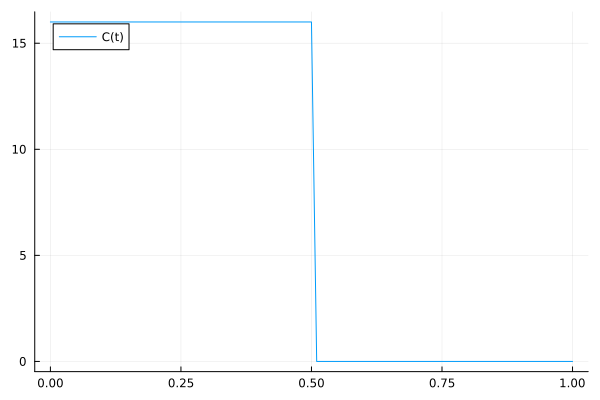

In [32]:
plot(0:0.01:1, C, label="C(t)", legend=:topleft)

In [36]:
ivp6 = ODEProblem(f, u₀, tspan, log(2)/6)
ivp8 = ODEProblem(f, u₀, tspan, log(2)/8)
sol6 = solve(ivp6, Tsit5());
sol8 = solve(ivp8, Tsit5());
plot((sol6, sol8), label="u(t)", legend=:topleft)

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


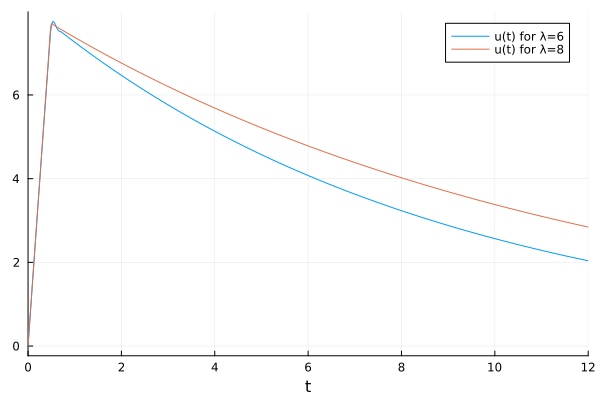

In [39]:
# Plot both solutions:
plot(sol6, label="u(t) for λ=6", legend=:topright)
plot!(sol8, label="u(t) for λ=8")

### Existence and uniqueness

Theorem: If  $\frac{\partial f}{\partial u}$ exists and $|\frac{\partial f}{\partial u}|$ is bounded by a constant $L$ for all $a \leq t \leq b$  then the IVP problem defined above has a unique solution.

#### Exercise 6.1.1 and 6.1.2
Determine whether these problems satisfy the conditions of the above theorem and if so determine the smallest value for L.  Then solve it using `solve` and plot the solution, with initial condition $u(0) = 1$.

c) $f(t,u) = -(1+t^2)u^2$,   $1 \leq t \leq 3$  

This IVP will decay to zero , the solution $u$ is bounded by $u_0$. The partial derivative is $-2(1+t^2)u$ which is bounded in absolute value by $2(1+3^2)u_0$.  So $L = $20 u_0$.


┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


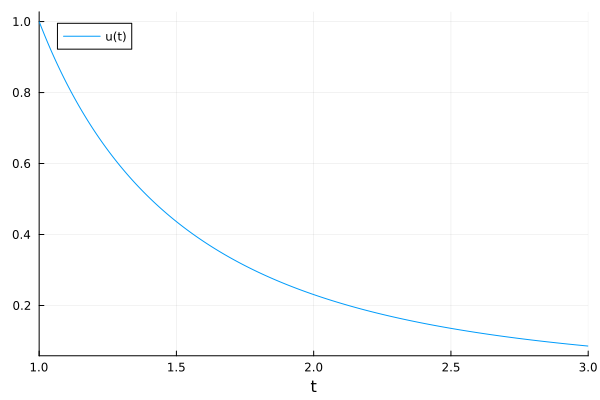

In [42]:
ivp_c = ODEProblem((u,p,t) -> -(1 + t^2)*u^2, 1.0, (1.0, 3.0))
sol_c = solve(ivp_c, Tsit5())
plot(sol_c, label="u(t)", legend=:topleft)

d) $f(t,u) = \sqrt{u}$,   $0 \leq t \leq 1$

The partial derivative is $\frac{1}{2\sqrt{u}}$ which is bounded in absolute value by $\frac{1}{2\sqrt{u(1)}}$.   So $L = \frac{1}{2\sqrt{u(1)}}$.

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


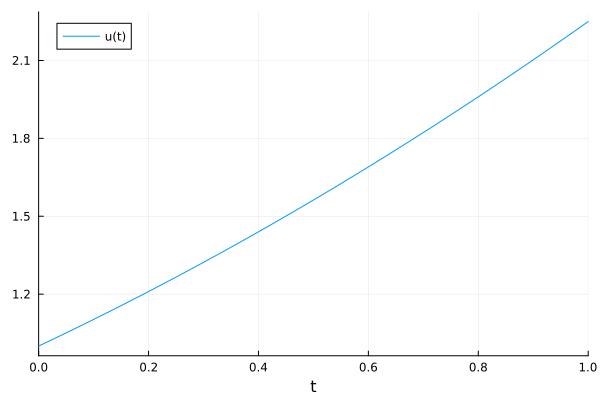

In [44]:
ivp_d = ODEProblem((u,p,t) -> sqrt(u), 1.0, (0.0, 1.0))
sol_d = solve(ivp_d, Tsit5())
plot(sol_d, label="u(t)", legend=:topleft)

### Conditioning of first order IVP

Theorem: If  $\frac{\partial f}{\partial u}$ exists and $|\frac{\partial f}{\partial u}|$ is bounded by a constant $L$ for all $a \leq t \leq b$  then the solution $u(t; u_0 + \delta)$ of $u' = f(t,u)$ with initial condition $u(a) = u_0 + \delta$ satisfies:
$$
\left\|u(t;u_0+\delta)-u(t;u_0)\right\|_\infty \le |\delta| e^{L(b-a)}
$$
for all sufficiently small $\delta$.

This upper bound may be a terrible overestimate for some cases (for example, text gives an example where solutions converge)

## 6.2 Euler's method

Look for a numerical solution at a finite set of equally spaced points:
$$
t_i = a + i h, \quad
h = \frac{b-a}{n}, \quad
i = 0,1,2,\ldots,n.
$$

One simple approach is to approximate the derivative by a finite difference:
$$
u'(t_i) \approx \frac{u(t_{i+1})-u(t_i)}{h}.
$$


Applying this to the IVP gives the *Euler method*:

$$
u_{i+1} = u_i + h f(t_i,u_i), \quad i = 0,1,2,\ldots,n-1.
$$

where $u_i$ is an approximation to $u(t_i)$.

This a *one-step IVP* method because it only uses the previous value $u_i$ to compute the next value $u_{i+1}$.

In [16]:
"""
    euler(ivp,n)

Apply Euler's method to solve the given IVP using `n` time steps.
Returns a vector of times and a vector of solution values.
"""
function euler(ivp,n)
    # Time discretization.
    a,b = ivp.tspan
    h = (b-a)/n
    t = [ a + i*h for i in 0:n ]

    # Initial condition and output setup.
    u = fill(float(ivp.u0),n+1)

    # The time stepping iteration.
    for i in 1:n
        u[i+1] = u[i] + h*ivp.f(u[i],ivp.p,t[i])
    end
    return t,u
end

euler

### Local Truncation error

General one-step method:
$$
u_{i+1} = u_i + h \phi(t_i,u_i,h)
$$


Local Truncation Error (LTE) is defined as:
$$
\tau_{i+1} = \frac{\hat{u}(t_{i+1})-\hat{u}(t_i)}{h} - \phi(t_i,\hat{u}(t_i),h)
$$

Where $\hat{u}(t)$ is the exact solution to the IVP and $\phi(t,u,h)$ is the one-step method.

A method is *consistent* if $\tau -> 0$ as $h->0$

For the euler method, the text shows (using Taylor series) that the LTE for the Euler method is $\frac{1}{2} h \hat{u}''(t_i) + O(h^2)$ and so Euler is consistent
 

### Convergence

* We really should care about the *global error*, which is a vector of errors at all times
* Global error can also mean the max norm or final value of this vector

Text shows that the global error for is $O(h^p)$ if the LTE satisfies $|\tau_{i+1}| \leq C h^p$
For a one step method $p$ is known as the order of accuracy.

For Euler method, $p=1$ so the global error is $O(h)$

### Exercise 6.2.2 

In this exercise they give us an ODE and the exact solution.  We are to plot the Euler method for n= 320, and then compute the error at the final time for $n = 10 \dot 2^k$ for $k= 2,3,...,10$ and make a log-log convergence plot including a reference line for first order convergence

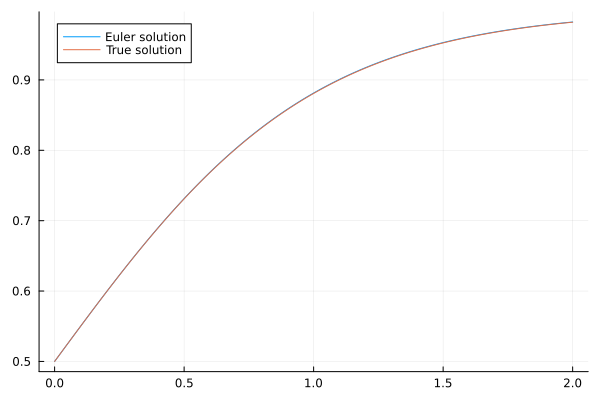

In [59]:
function fit_and_plot(f, u_0, timespan, true_sol, n)
    ivp = ODEProblem(f, u_0, timespan)
    t,u = euler(ivp,n)
    plot(t,u, label="Euler solution")
    plot!(t, true_sol, label="True solution")
end

fit_and_plot((u,p,t) -> 2*u*(1-u), 0.5, (0.0, 2.0), t -> 1/(1 + exp(-2*t)), 320)

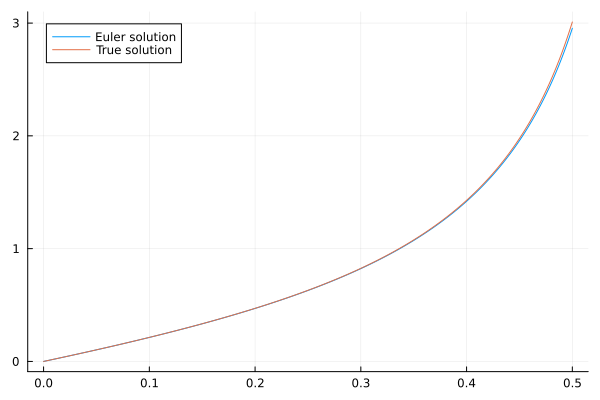

In [60]:
fit_and_plot((u,p,t) -> 2*(1+t)*(1+u^2), 0.0, (0.0, 0.5), t -> tan(2*t+ t^2), 320)

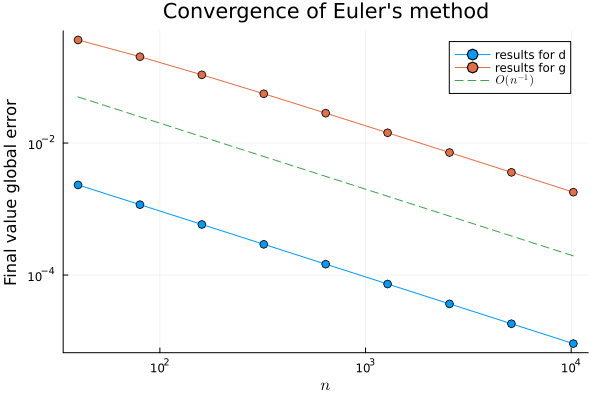

In [79]:
error_at_final_time(f, u_0, timespan, true_sol, n) = abs(euler(ODEProblem(f, u_0, timespan), n)[2][end] - true_sol(timespan[2]))


ns = [10*2^k for k in 2:10]

error_d = [error_at_final_time((u,p,t) -> 2*u*(1-u), 0.5, (0.0, 2.0), t -> 1/(1 + exp(-2*t)), n) for n in ns]
error_g = [error_at_final_time((u,p,t) -> 2*(1+t)*(1+u^2), 0.0, (0.0, 0.5), t -> tan(2*t+ t^2), n) for n in ns]

plot(ns,error_d,m=:o,label="results for d", 
    xaxis=(:log10,L"n"), yaxis=(:log10,"Final value global error"),
    title="Convergence of Euler's method")

plot!(ns,error_g,m=:o,label="results for g")
# Add line for perfect 1st order.
plot!(ns,0.05*(ns/ns[1]).^(-1),l=:dash,label=L"O(n^{-1})")

## 6.3 IVP Systems

Vector valued IVP / IVP system:


  
$$
  \mathbf{u}'(t) = \mathbf{f}\bigl(t,\mathbf{u}(t)\bigr), \qquad a \le t \le b, \qquad
  \mathbf{u}(a)=\mathbf{u}_0,
$$

where $\mathbf{u}(t)$ is $m$-dimensional. If $\mathbf{f}(t,\mathbf{u})=\mathbf{A}(t)\mathbf{u}(t)+ \mathbf{g}(t)$, the differential equation is **linear**; otherwise, it is **nonlinear**.


As text shows, the numerical methods can be extended to handle vector valued IVPs straightforwardly.  We just need to code the function and initial conditions as vectors. Note that `euler` defined previously still works fine.

### Higher order ODE

* Any higher order ODE can be converted to a vector valued ODE by introducing new variables for the derivatives

* For example, $u'' = f(t,u,u')$ can be converted to a system of two first order ODEs by introducing $v = u'$ and $v' = u'' = f(t,u,v)$

### Exercise 6.3.4

A disease that is endemic to a population can be modeled by tracking the fraction of the population that is susceptible to infection, $v(t)$, and the fraction that is infectious, $w(t)$. (The rest of the population is considered to be recovered and immune.) A typical model is the *SIR model* (susceptible, infectious, recovered)
$$
\frac{dv}{dt} = 0.2(1-v) - 3vw, \qquad \frac{dw}{dt} = (3v-1)w.
$$

Starting with $v(0) = 0.95$ and $w(0) = 0.05$, use `solve` to find the long-term steady values of $v(t)$ and $w(t)$. Plot both components of the solution as functions of time.

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


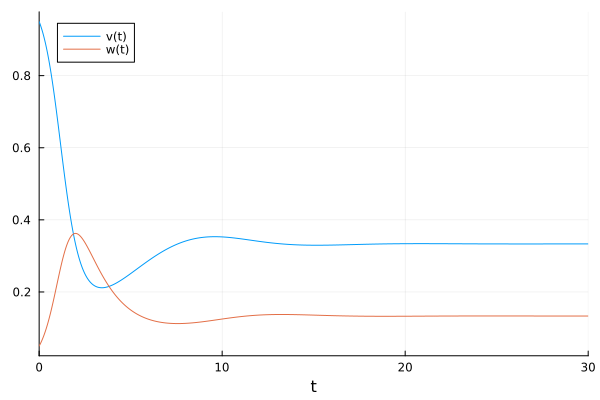

In [87]:
# u[1] is v, u[2] is w

sir = (u,p,t) -> [0.2*(1-u[1])- 3*u[1]*u[2]; (3*u[1] -1)*u[2]]

ivp = ODEProblem(sir, [0.95, 0.05], (0, 30.0))

sol = solve(ivp, Tsit5())
plot(sol,vars=[1,2], label=["v(t)" "w(t)"], legend=:topleft)

Note that a tuple is interpreted by plot differently!  
ALso note that `vars` as used in the text still works but doesn't appear in documentation, might be deprecated.

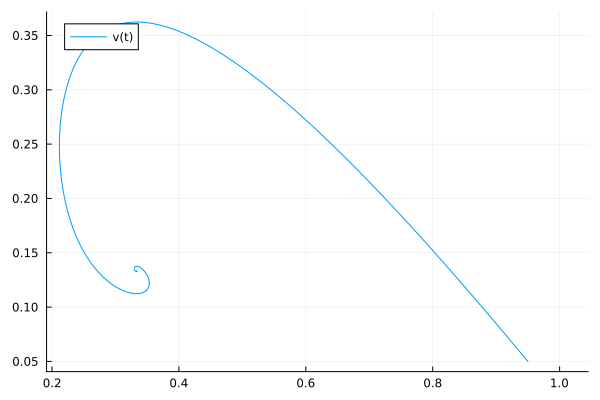

In [91]:
plot(sol,idxs=(1,2), label=["v(t)" "w(t)"], legend=:topleft)

## 6.4 Runge-Kutta methods

* Runge-Kutta boost the order of accuracy by using more evaluations of $f$ per step.

* These are the most widely used methods for solving ODEs

### Improved Euler method

* Start with Taylor series for the exact solution $u' = f(t,u)$:  (not using the 'hat' notation for exact solution here)

$$
u(t_{i+1}) = u(t_i) + h u'(t) + \frac{h^2}{2} u''(t_i) + O(h^3)
$$

* Substitute $u'(t) = f(t,u(t))$ and $u''(t) =  f_t(t,u(t)) + f_u(t,u(t)) f(t,u(t))$  

$$
u(t_{i+1}) = u(t_i) + h \left[f(t_i,u(t_i)) + \frac{h}{2} \left( f_t(t_i,u(t_i)) + f_u(t_i,u(t_i)) f(t_i,u(t_i)) \right) \right]+ O(h^3)
$$

* Observe:

$$
f(t_i + \frac{h}{2}, u(t_i) + \frac{h}{2} f(t_i,u(t_i))) \approx f(t_i,u(t_i)) + \frac{h}{2} \left( f_t(t_i,u(t_i)) + f_u(t_i,u(t_i)) f(t_i,u(t_i)) \right) + O(h^3)
$$

* This matches the term in brackets, so we can substitute this instead of explicit differentiation. Truncation of the series and substitution results in the *Improved Euler method*:

$$
u_{i+1} = u_i + h f\left(t_i + \frac{h}{2}, u_i + \frac{h}{2} f(t_i,u_i)\right)  
$$

* Runge-Kutta are called multistage methods because they evaluate $f$ multiple times per step. Improved Euler 2 can be written as explicit two step method:

$$
\begin{align}
k_1 &= h f(t_i,u_i) \\
k_2 &= h f(t_i + \frac{h}{2}, u_i + \frac{1}{2} k_1) \\
u_{i+1} &= u_i +  k_2
\end{align}
$$

#### Implementation

In [17]:
"""
    ie2(ivp,n)

Apply the Improved Euler method to solve the given IVP using `n`
time steps. Returns a vector of times and a vector of solution
values.
"""
function ie2(ivp,n)
    # Time discretization.
    a,b = ivp.tspan
    h = (b-a)/n
    t = [ a + i*h for i in 0:n ]

    # Initialize output.
    u = fill(float(ivp.u0),n+1)

    # Time stepping.
    for i in 1:n
        uhalf = u[i] + h/2*ivp.f(u[i],ivp.p,t[i]);
        u[i+1] = u[i] + h*ivp.f(uhalf,ivp.p,t[i]+h/2);
    end
    return t,u
end

ie2

### More Runge-Kutta methods

* The methods used for IE2 can be generalized to $s$ stages, the text gives some examples.

* The most important is the *classical fourth-order Runge-Kutta method* (RK4) which is the most widely used method for solving ODEs.

$$
  \begin{split}
    k_1 &= hf(t_i,u_i), \\
    k_2 &= hf(t_i+h/2,u_i+k_1/2),\\
    k_3 &= hf(t_i+h/2,u_i+k_2/2),\\
    k_4 &= hf(t_i+h,u_i+k_3),\\
    u_{i+1} &= u_i + \frac{1}{6} k_1 + \frac{1}{3} k_2 + \frac{1}{3} k_3 + \frac{1}{6} k_4.
  \end{split}
  $$

  * Text makes the point that 4th order is a 'sweet' spot in efficiency vs accuracy. 

#### Implementation

In [18]:
"""
    rk4(ivp,n)

Apply the common Runge-Kutta 4th order method to solve the given 
IVP using `n` time steps. Returns a vector of times and a vector of
solution values.
"""
function rk4(ivp,n)
    # Time discretization.
    a,b = ivp.tspan
    h = (b-a)/n
    t = [ a + i*h for i in 0:n ]

    # Initialize output.
    u = fill(float(ivp.u0),n+1)

    # Time stepping.
    for i in 1:n
        k₁ = h*ivp.f( u[i],      ivp.p, t[i]     )
        k₂ = h*ivp.f( u[i]+k₁/2, ivp.p, t[i]+h/2 )
        k₃ = h*ivp.f( u[i]+k₂/2, ivp.p, t[i]+h/2 )
        k₄ = h*ivp.f( u[i]+k₃,   ivp.p, t[i]+h   )
        u[i+1] = u[i] + (k₁ + 2(k₂+k₃) + k₄)/6
    end
    return t,u
end

rk4

#### Example

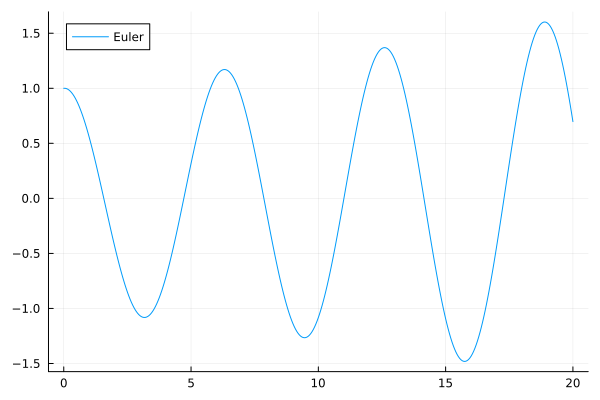

In [38]:
### SHO
f(u,p,t) = [u[2]; -u[1]]
t , u = euler(ODEProblem(f, [1.0, 0.0], (0.0, 20.0)), 400)
plot(t, [el[1] for el in u], label="Euler")

In [19]:
t , u = ie2(ODEProblem(f, [1.0, 0.0], (0.0, 20.0)), 200)
plot(t, [el[1] for el in u], label="ie2")

MethodError: MethodError: no method matching -(::SciMLBase.NullParameters)

Closest candidates are:
  -(::Any, !Matched::Intervals.Interval)
   @ Intervals C:\Users\rjljr\.julia\packages\Intervals\V53WF\src\interval.jl:285
  -(::Any, !Matched::VectorizationBase.CartesianVIndex)
   @ VectorizationBase C:\Users\rjljr\.julia\packages\VectorizationBase\MvgPF\src\cartesianvindex.jl:69
  -(::Any, !Matched::ChainRulesCore.AbstractThunk)
   @ ChainRulesCore C:\Users\rjljr\.julia\packages\ChainRulesCore\0t04l\src\tangent_types\thunks.jl:35
  ...


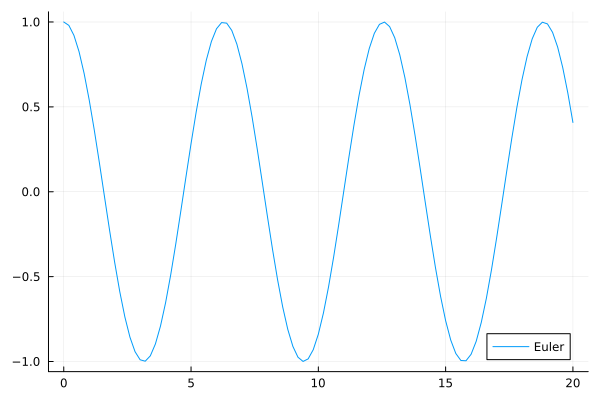

In [37]:
t , u = rk4(ODEProblem(f, [1.0, 0.0], (0.0, 20.0)), 100)
plot(t, [el[1] for el in u], label="RK4")

### Problem 6.4.10 
Apply RK4 to the SIR model from Exercise 6.3.4  

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


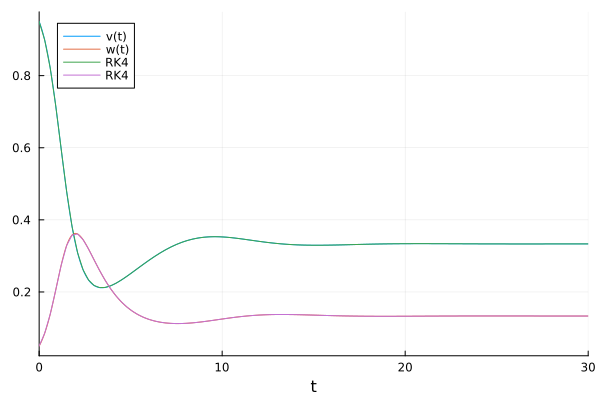

In [20]:
# u[1] is v, u[2] is w
sir = (u,p,t) -> [0.2*(1-u[1])- 3*u[1]*u[2]; (3*u[1] -1)*u[2]]
ivp = ODEProblem(sir, [0.95, 0.05], (0, 30.0))
sol = solve(ivp, Tsit5())
plot(sol, label=["v(t)" "w(t)"], legend=:topleft)

## RK4
t, u = rk4(ivp, 100)
u = reduce(hcat, u)'  # turn vector of vectors into matrix
plot!(t, u, label="RK4")

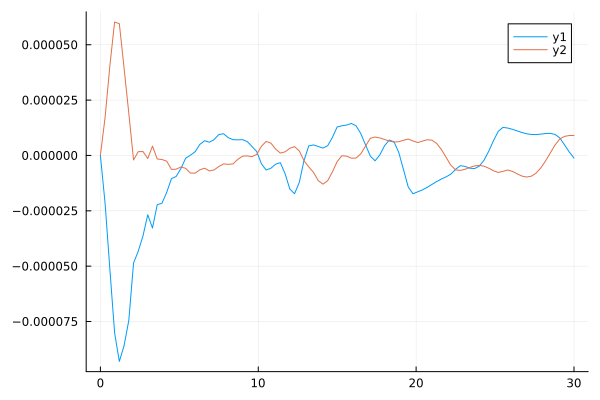

In [21]:
plot(t, [el[1] for el in sol(t).u ] - u[:,1])
plot!(t, [el[2] for el in sol(t).u ] - u[:,2])

### Problem 6.4.9

For each IVP, compute the solution using rk4. 
(i) Plot the solution for $n=300$. 
(ii) For $n=100,200,300,\ldots,1000$, compute the error at the final time and make a log-log convergence plot, including a reference line for fourth-order convergence.

I chose  (d) arbitrarily. 

 
**(d)** 
$u''+ 4u'+ 4u = t, \: 0< t< 4, \: u(0) = 1,\: u'(0) = 3/4; \: \hat{u}(t) = (3t+5/4)e^{-2t} + (t-1)/4$


First we turn into a system of first order ODEs:

$$
\begin{align}
u' &= v\\
v' &= t - 4v - 4u
\end{align}
$$

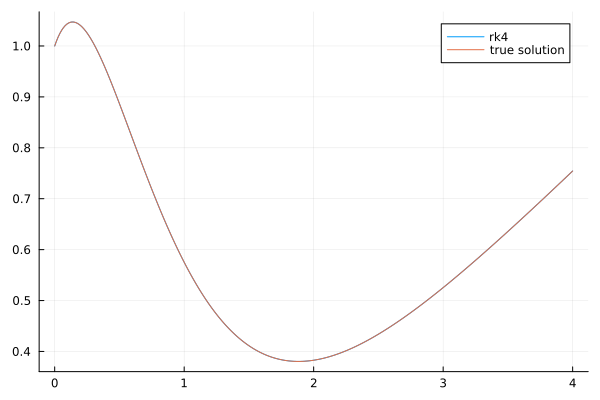

In [22]:
# u[1] is u , u[2] is v = u'
prob_d = (u,p,t) -> [u[2];  -4*u[2] - 4*u[1] + t]

ivp = ODEProblem(prob_d, [1.0, 0.75], (0, 4.0))
t, u = rk4(ivp, 300)
u = [el[1] for el in u] 
plot(t, u, label="rk4", legend=:topright)
true_sol = (t) -> ((3*t + 5/4)* exp(-2*t) + (t-1)/4)
plot!(t, true_sol, label="true solution")

In [30]:
#shape
typeof(rk4(ivp, 300))

Tuple{Vector{Float64}, Vector{Vector{Float64}}}

In [31]:
rk4(ivp, 33)[2][end][1]

0.7544453948534556

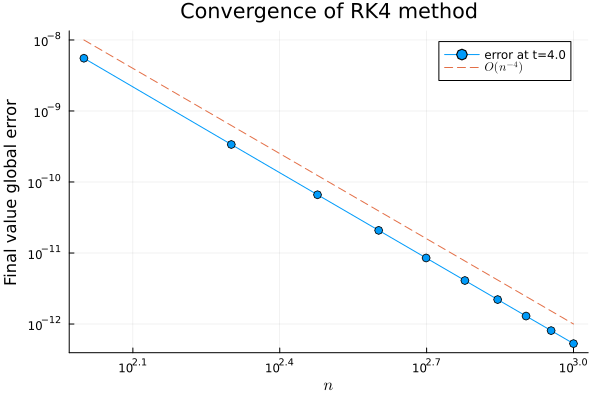

In [28]:
ns = 100:100:1000
error = [abs(rk4(ivp, n)[2][end][1] - true_sol(4.0)) for n in ns]


plot(ns,error,m=:o,label="error at t=4.0",
    xaxis=(:log10,L"n"), yaxis=(:log10,"Final value global error"),
    title="Convergence of RK4 method")
 
# Add line for perfect 4th order.
plot!(ns,1e-8*(ns/ns[1]).^(-4),l=:dash,label=L"O(n^{-4})")